In [1]:
# importing packages

In [2]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [3]:
# importing all files

In [4]:
Comp_Spending_v2 = pd.read_csv(r'C:\Users\v-sanysa\Affine Analytics Pvt Ltd\Sayantan Chakraborty - WB Theatrical - Documents\02. Data\Long formatted data\Comp_Spending_v2.csv')
Total_theater_sales_v2 = pd.read_csv(r'C:\Users\v-sanysa\Affine Analytics Pvt Ltd\Sayantan Chakraborty - WB Theatrical - Documents\02. Data\Long formatted data\Total_theater_sales_v2.csv')
common_imdb_title_codes_v2 = pd.read_csv(r'C:\Users\v-sanysa\Affine Analytics Pvt Ltd\Sayantan Chakraborty - WB Theatrical - Documents\02. Data\Long formatted data\backup_files\common_imdb_title_codes_v2.csv')

In [5]:
# preparing dataset

In [6]:
Total_theater_sales_v2 = common_imdb_title_codes_v2.merge(right = Total_theater_sales_v2,
                                                          how = 'left',
                                                          left_on = ['common_title_codes'],
                                                          right_on = ['IMDB_Title_Code'],
                                                          sort = True,
                                                          copy = False)
Total_theater_sales_v2.drop(labels = Total_theater_sales_v2.columns[0],
                            axis = 1,
                            inplace =True)
Total_theater_sales_v2 = Total_theater_sales_v2.merge(right = Comp_Spending_v2,
                                                      how = 'left',
                                                      left_on = ['IMDB_Title_Code'],
                                                      right_on = ['IMDB_Title_Code'],
                                                      sort = True,
                                                      copy = False)

In [7]:
# 2.1.1	: Peak BO month flag for studio

In [23]:
Total_theater_sales_v2['Total_BO'] = Total_theater_sales_v2['Native_BO_2D_Amount']\
                                  + Total_theater_sales_v2['Native_BO_3D_Amount']\
                                  + Total_theater_sales_v2['Native_BO_3D_IMAX_Amount']\
                                  + Total_theater_sales_v2['Native_BO_IMAX_Amount']

Total_theater_sales_v2['Month_of_Release'] = pd.DatetimeIndex(Total_theater_sales_v2['Theatrical_Release_Date']).month

df_grp_studio_month = Total_theater_sales_v2.groupby(['Studio',
                                             'Month_of_Release'])[['Native_BO_2D_Amount',
                                                                   'Native_BO_3D_Amount',
                                                                   'Native_BO_3D_IMAX_Amount',
                                                                   'Native_BO_IMAX_Amount',
                                                                   'Opening_Weekend_BO',
                                                                   'Opening_Weekend_Runs',
                                                                   'Total_BO']].sum().reset_index()

df_grp_studio_month = df_grp_studio_month.loc[df_grp_studio_month.groupby(['Studio'])['Total_BO'].idxmax()]
df_grp_studio_month[['Studio', 'Month_of_Release']].reset_index(drop=True)

Studio  Month_of_Release
0       DISNEY                12
1          FOX                12
2    LIONSGATE                11
3    PARAMOUNT                11
4         SONY                12
5    UNIVERSAL                12
6  WARNER BROS                 9

In [17]:
# 2.1.2	: Peak BO month flag for studio-genre

In [24]:
df_grp_studio_month = Total_theater_sales_v2.groupby(['Studio',
                                                      'Genre',
                                                      'Month_of_Release'])[['Native_BO_2D_Amount',
                                                                   'Native_BO_3D_Amount',
                                                                   'Native_BO_3D_IMAX_Amount',
                                                                   'Native_BO_IMAX_Amount',
                                                                   'Opening_Weekend_BO',
                                                                   'Opening_Weekend_Runs',
                                                                   'Total_BO']].sum().reset_index()

df_grp_studio_month = df_grp_studio_month.loc[df_grp_studio_month.groupby(['Studio', 'Genre'])['Total_BO'].idxmax()]
df_grp_studio_month[['Studio', 'Genre', 'Month_of_Release']].reset_index(drop=True)

Studio    Genre  Month_of_Release
0        DISNEY   ACTION                11
1        DISNEY   FAMILY                 3
2        DISNEY   SCI-FI                12
3           FOX   ACTION                 3
4           FOX   COMEDY                12
5           FOX    DRAMA                12
6           FOX   FAMILY                 3
7           FOX  MUSICAL                12
8           FOX   SCI-FI                 7
9     LIONSGATE   ACTION                 2
10    LIONSGATE   COMEDY                 6
11    LIONSGATE    DRAMA                11
12    LIONSGATE   FAMILY                10
13    LIONSGATE   HORROR                10
14    LIONSGATE  WESTERN                12
15    PARAMOUNT   ACTION                 6
16    PARAMOUNT   COMEDY                11
17    PARAMOUNT    DRAMA                12
18    PARAMOUNT   HORROR                 2
19    PARAMOUNT   SCI-FI                11
20         SONY   ACTION                12
21         SONY   COMEDY                 6
22         SONY    DRAMA                10
23         SONY   FAMILY                 7
24         SONY   HORROR                 8
25         SONY   SCI-FI                12
26         SONY  WESTERN                 9
27    UNIVERSAL   ACTION                 6
28    UNIVERSAL   COMEDY                 7
29    UNIVERSAL    DRAMA                 2
30    UNIVERSAL   FAMILY                12
31    UNIVERSAL   HORROR                 2
32    UNIVERSAL   SCI-FI                11
33  WARNER BROS   ACTION                11
34  WARNER BROS    DRAMA                 7
35  WARNER BROS   FAMILY                 2
36  WARNER BROS   HORROR                 9
37  WARNER BROS   SCI-FI                10

In [19]:
# 2.1.3 : Average, total BO amount by Studio

In [27]:
df_grp_studio_month = Total_theater_sales_v2.groupby(['Studio']).agg({"Total_BO": ['sum', 'mean']})
df_grp_studio_month.columns = ["_".join(x) for x in df_grp_studio_month.columns.ravel()]
df_grp_studio_month = df_grp_studio_month.rename(columns = {'Total_BO_sum' : 'Total_BO', 'Total_BO_mean' : 'Avg_BO'})
df_grp_studio_month

Total_BO        Avg_BO
Studio                               
DISNEY       3205270356  3.561412e+08
FOX          1902515481  1.001324e+08
LIONSGATE     816712392  5.444749e+07
PARAMOUNT     730226485  6.085221e+07
SONY         1442999480  9.619997e+07
UNIVERSAL    1694503527  9.967668e+07
WARNER BROS  1525722591  1.525723e+08

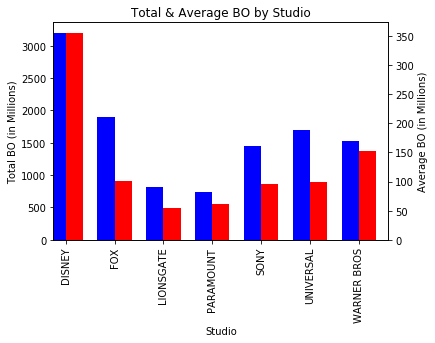

In [28]:
# plot
fig = plt.figure()
bar_width = 0.35
ax = fig.add_subplot(111)
ax2 = ax.twinx()
(df_grp_studio_month['Total_BO']/1000000).plot(kind = 'bar', width = bar_width, color='blue', ax=ax, position = 1)
(df_grp_studio_month['Avg_BO']/1000000).plot(kind = 'bar', width = bar_width, color='red', ax=ax2, position=0)
ax.set_ylabel('Total BO (in Millions)')
ax2.set_ylabel('Average BO (in Millions)')
plt.xlabel('Studio')
plt.title('Total & Average BO by Studio')
plt.show()

In [ ]:
# 2.1.4	: Average, total BO amount by Studio-Genre

In [43]:
df_grp_studio_month = Total_theater_sales_v2.groupby(['Genre', 'Studio']).agg({"Total_BO": ['sum', 'mean']})
df_grp_studio_month.columns = ["_".join(x) for x in df_grp_studio_month.columns.ravel()]
df_grp_studio_month = df_grp_studio_month.rename(columns = {'Total_BO_sum' : 'Total_BO', 'Total_BO_mean' : 'Avg_BO'})
df_grp_studio_month = df_grp_studio_month.reset_index()

df_grp_studio_month.pivot(index='Genre',columns='Studio',values='Total_BO')

Studio         DISNEY          FOX    LIONSGATE    PARAMOUNT         SONY  \
Genre                                                                       
ACTION   9.375133e+08  469540852.0  294051705.0  320394176.0  961934789.0   
COMEDY            NaN  106175964.0   95029020.0  183246691.0   22105643.0   
DRAMA             NaN  336293265.0  337874614.0   57682904.0   18340051.0   
FAMILY   1.115398e+09  595023033.0   21885107.0          NaN  131109794.0   
HORROR            NaN          NaN   38052832.0   27793018.0  116061848.0   
MUSICAL           NaN  174340174.0          NaN          NaN          NaN   
SCI-FI   1.152359e+09  221142193.0          NaN  141109696.0  100014700.0   
WESTERN           NaN          NaN   29819114.0          NaN   93432655.0   

Studio     UNIVERSAL  WARNER BROS  
Genre                              
ACTION   204041468.0  397077108.0  
COMEDY   319960751.0          NaN  
DRAMA    144595789.0  401398358.0  
FAMILY   599528344.0  307711218.0  
HORROR   370015875.0  327481748.0  
MUSICAL          NaN          NaN  
SCI-FI    56361300.0   92054159.0  
WESTERN          NaN          NaN

In [44]:
df_grp_studio_month.pivot(index='Genre',columns='Studio',values='Avg_BO')

Studio         DISNEY          FOX    LIONSGATE     PARAMOUNT          SONY  \
Genre                                                                         
ACTION   3.125044e+08   93908170.4  73512926.25  6.407884e+07  1.603225e+08   
COMEDY            NaN   53087982.0  31676340.00  6.108223e+07  2.210564e+07   
DRAMA             NaN  112097755.0  67574922.80  5.768290e+07  1.834005e+07   
FAMILY   2.788496e+08   99170505.5  21885107.00           NaN  6.555490e+07   
HORROR            NaN          NaN  38052832.00  2.779302e+07  3.868728e+07   
MUSICAL           NaN  174340174.0          NaN           NaN           NaN   
SCI-FI   5.761794e+08  110571096.5          NaN  7.055485e+07  1.000147e+08   
WESTERN           NaN          NaN  29819114.00           NaN  9.343266e+07   

Studio      UNIVERSAL   WARNER BROS  
Genre                                
ACTION   5.101037e+07  1.985386e+08  
COMEDY   7.999019e+07           NaN  
DRAMA    7.229789e+07  1.337995e+08  
FAMILY   1.998428e+08  1.025704e+08  
HORROR   1.233386e+08  3.274817e+08  
MUSICAL           NaN           NaN  
SCI-FI   5.636130e+07  9.205416e+07  
WESTERN           NaN           NaN